### Set up the parameters in cell below, then run the entire notebook to get a quick summary of the results from the simulation, and a framework for further analysis

In [13]:
# imports
import math
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Parameters
run_bundle_name = "BIG_CA_30"  # REPLACE WITH YOUR DESIRED SIMULATION RUN

# Other variables
male_colour = "#09bfc4"
female_colour = "#f86d63"
column_to_plot = {
    'alive': 'n_alive',
    'antibiotic_exposure': 'n_antibiotic_exposure',
    'asthma_incidence_contingency_table': None,
    'asthma_incidence': 'n_new_diagnoses',
    'asthma_prevalence_contingency_table': None,
    'asthma_prevalence': 'n_asthma',
    'asthma_status': 'status',
    'control': 'prob',
    'cost': 'cost',
    'death': 'n_deaths',
    'emigration': 'n_emigrants',
    'exacerbation_by_severity': 'p_exacerbations',
    'exacerbation_hospital': 'n_hospitalizations',
    'exacerbation': 'n_exacerbations',
    'family_history': 'has_family_history',
    'immigration': 'n_immigrants',
    'utility': 'utility',
}

In [41]:
# Utility functions
def plot_simulation_csv(run_bundle_name: str,
                        outcome_matrix_csv_name: str,
                        user_linewidth: int = 2):
    """
    Plots the simulation results from a CSV file.
    This function reads simulation data from a CSV file and generates a series of plots
    showing the number of alive individuals by age for each year, separated by sex.
    
    Parameters:
    -----------
    `run_bundle_name` : str
        The name of the simulation run bundle, which is used to locate the CSV file.
    `outcome_matrix_csv_name` : str
        The suffix name of the CSV file containing the simulation data.
        Must be one of the following:
        - 'alive',
        - 'antibiotic_exposure'
        - 'asthma_incidence_contingency_table'
        - 'asthma_incidence'
        - 'asthma_prevalence_contingency_table'
        - 'asthma_prevalence'
        - 'asthma_status'
        - 'control'
        - 'cost'
        - 'death'
        - 'emigration'
        - 'exacerbation_by_severity'
        - 'exacerbation_hospital'
        - 'family_history'
        - 'immigration'
        - 'utility'
    
    `user_linewidth` : int, optional
        The width of the lines in the plot (default is 2).
        
    Returns:
    --------
    None
        This function does not return any value. It displays the plots.
        
    Notes:
    ------
    - The CSV file should be located at `output/{run_bundle_name}/{outcome_matrix_csv_name}.csv`.
    - The CSV file should contain columns: "year", "age", and "sex"
    - The function assumes that `male_colour` and `female_colour` are predefined colors for the plots.
    """
    
    # Read in data from simulation
    csv_file_path = f"output/{run_bundle_name}/outcome_matrix_{outcome_matrix_csv_name}.csv"
    om_alive: pd.DataFrame = pd.read_csv(csv_file_path)

    # Figure Parameters
    years = om_alive["year"].unique()
    num_cols = 3
    # Dynamically calculate number of rows based on number of years and number of columns
    num_rows = math.ceil(len(years) / num_cols)

    # Set up figure and axes
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

    for i, year in enumerate(years):
        # Index axis to be in 2D grid of size (num_rows x num_cols) using i
        ax: plt.Axes = axs[i // num_cols][i % num_cols]

        # Filter simulation data by current year
        om_alive_modified = om_alive[om_alive["year"] == year]

        # Filter by males and females
        om_alive_M = om_alive_modified[om_alive_modified["sex"] == "M"]
        om_alive_F = om_alive_modified[om_alive_modified["sex"] == "F"]
        
        # Get name of column to plot
        column_name = column_to_plot[outcome_matrix_csv_name]

        ax.plot(om_alive_M["age"],
                om_alive_M[column_name],
                color=male_colour,
                linewidth=user_linewidth)

        ax.plot(om_alive_F["age"],
                om_alive_F[column_name],
                color=female_colour,
                linewidth=user_linewidth)

        # Set axis labels
        ax.set_title(f"{year}", fontsize=12)

    fig.supxlabel("Age (year)")
    fig.supylabel(column_name)
    fig.suptitle(f"Summary for <{csv_file_path}>", fontsize=16)
    fig.legend(["male", "female"])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### outcome_matrix_alive.csv

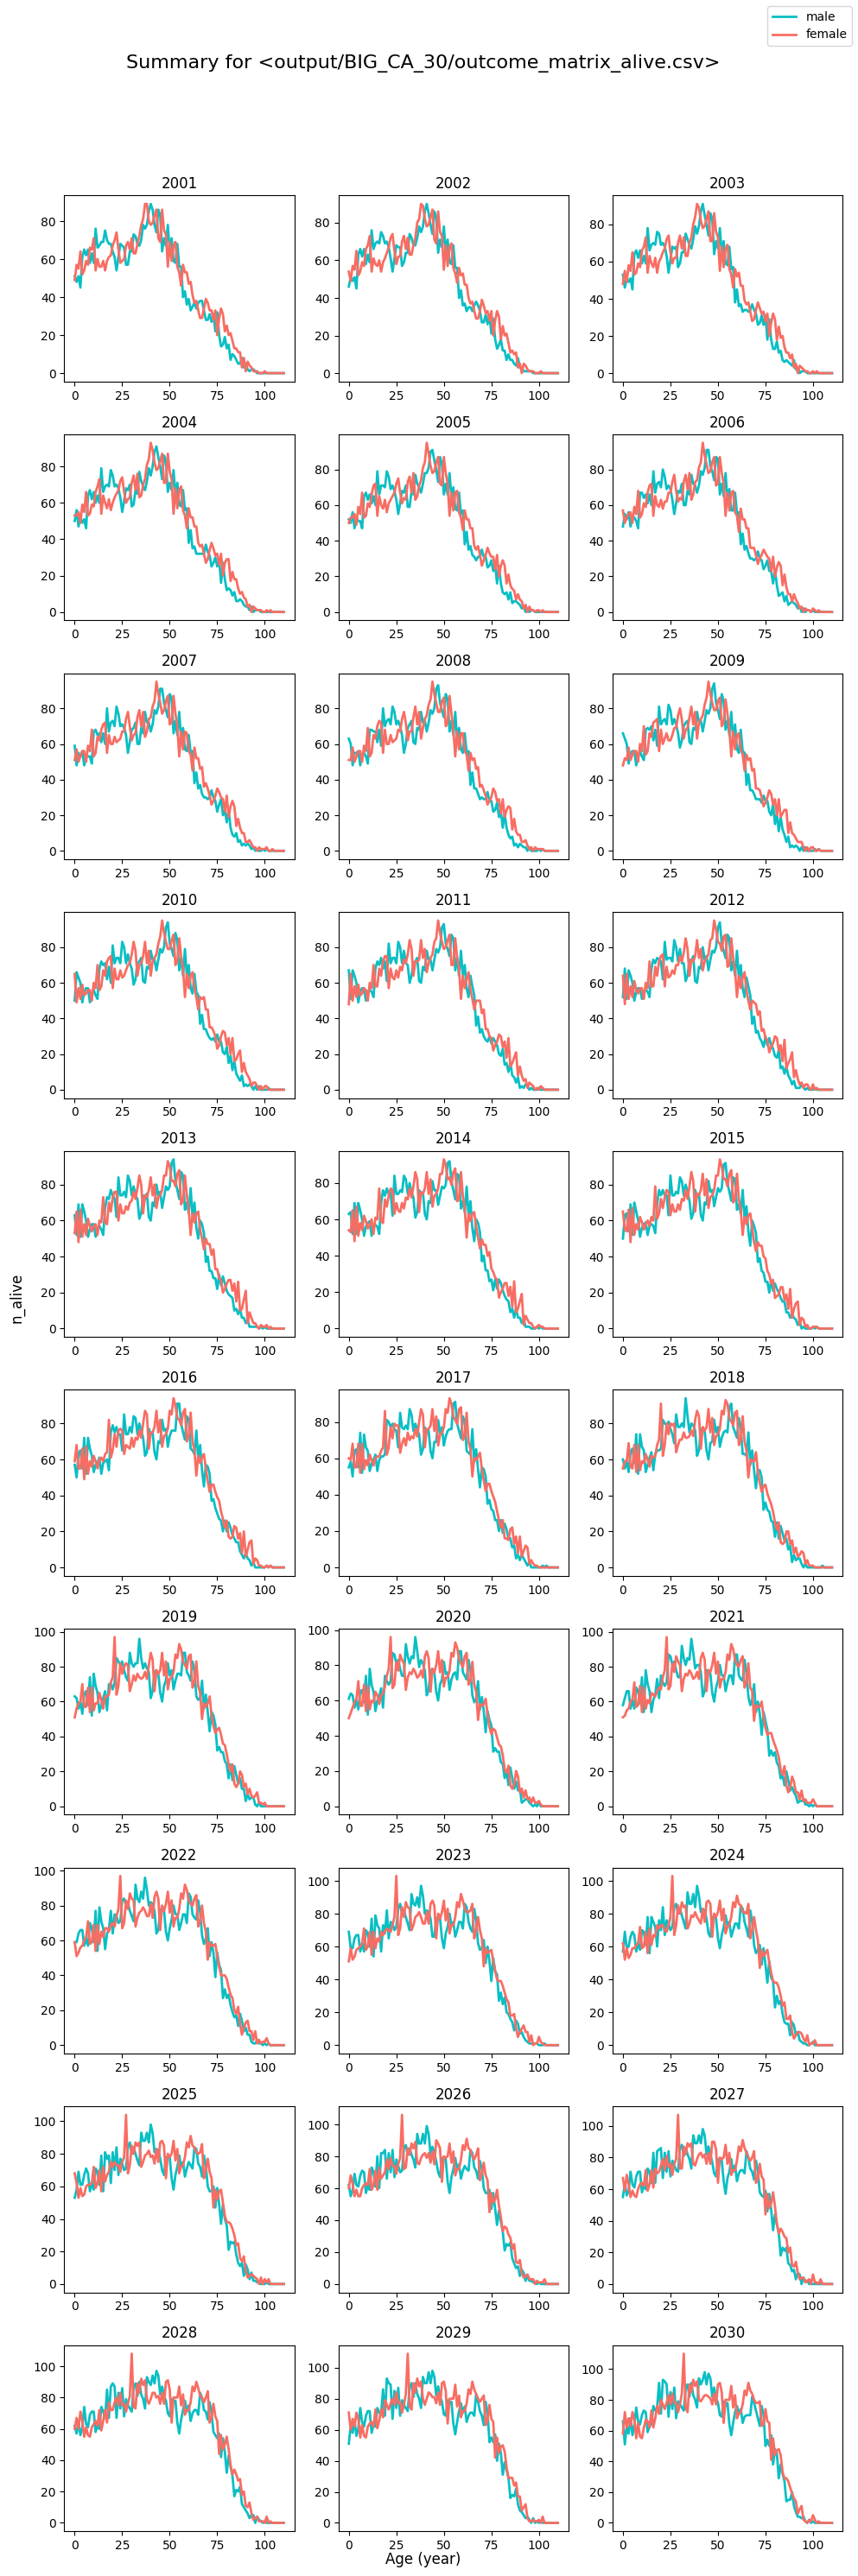

In [43]:
plot_simulation_csv('BIG_CA_30', 'alive', 2)

#### outcome_matrix_antibiotic_exposure.csv

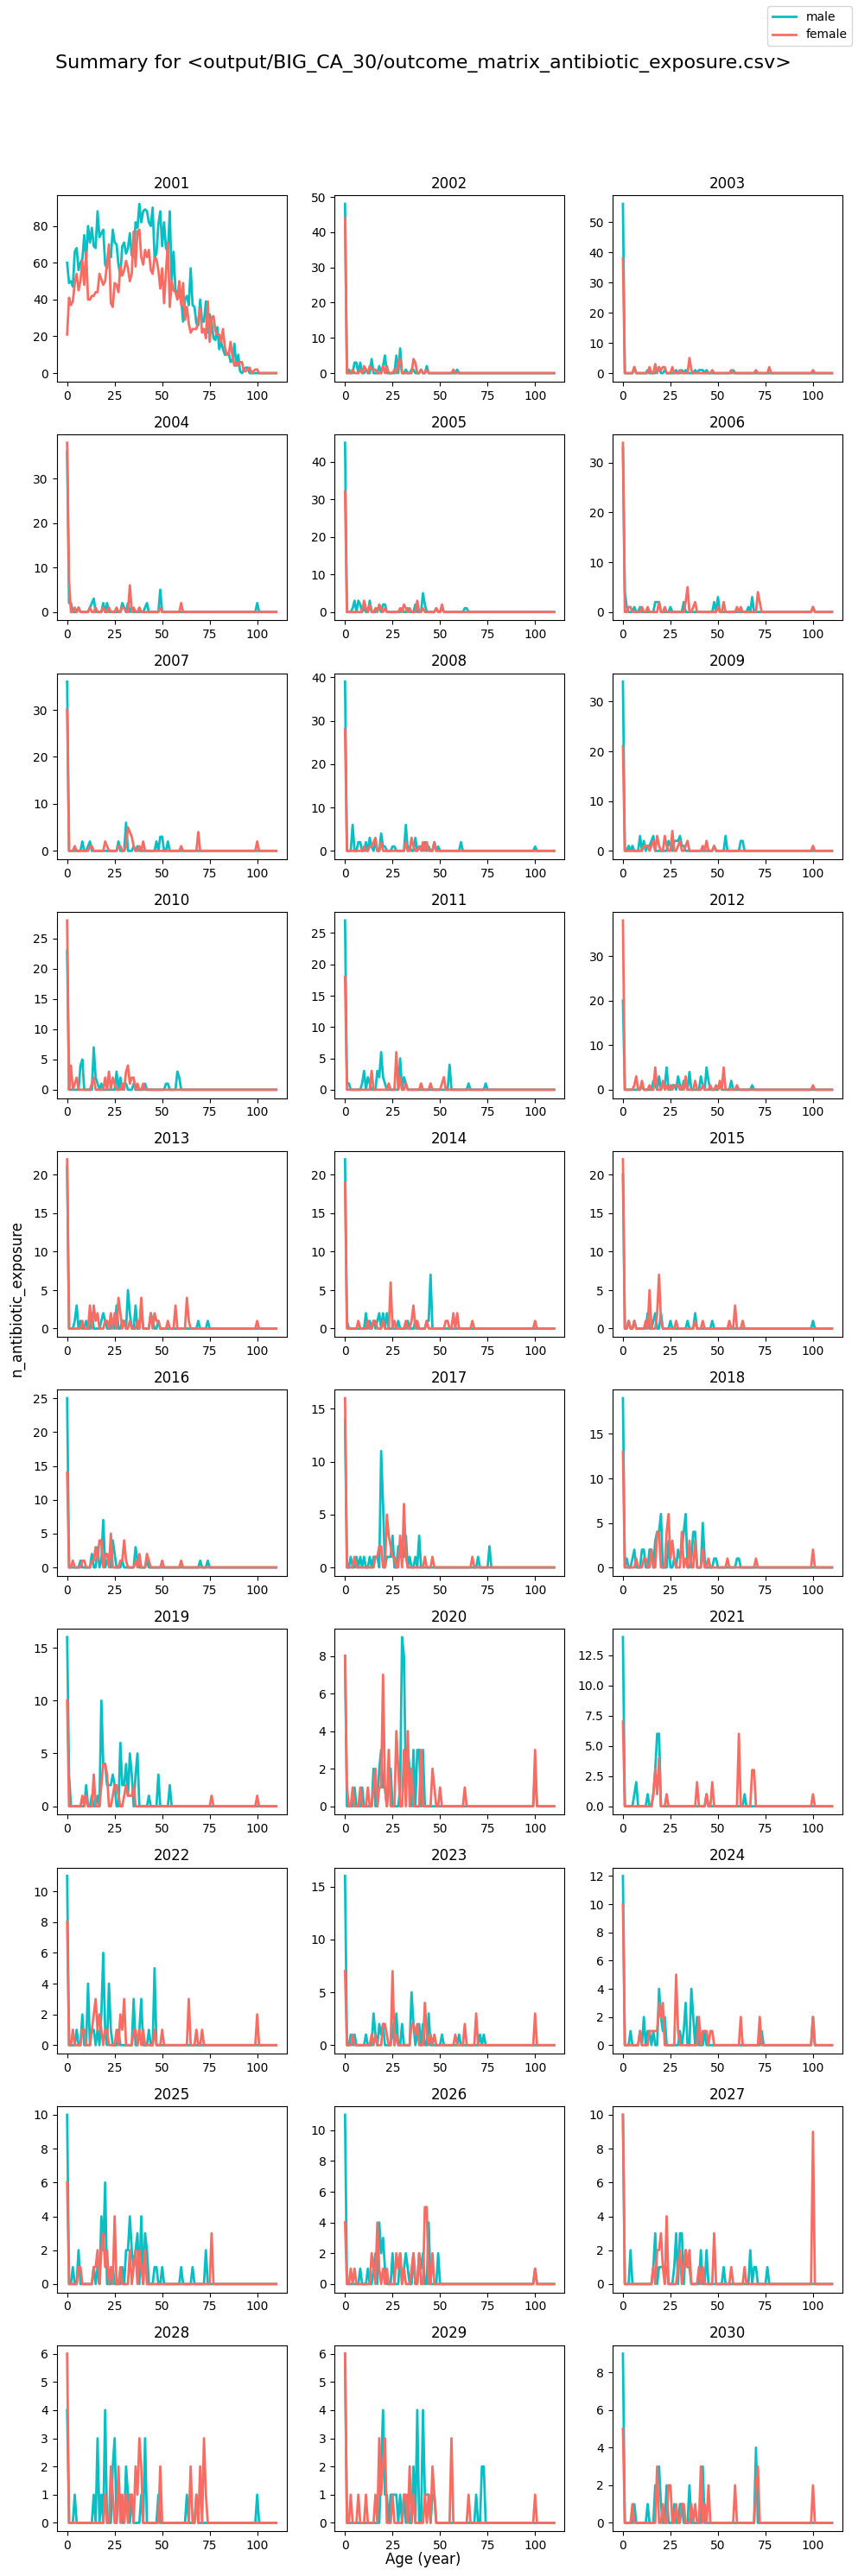

In [44]:
plot_simulation_csv('BIG_CA_30', 'antibiotic_exposure', 2)

#### outcome_matrix_utility.csv

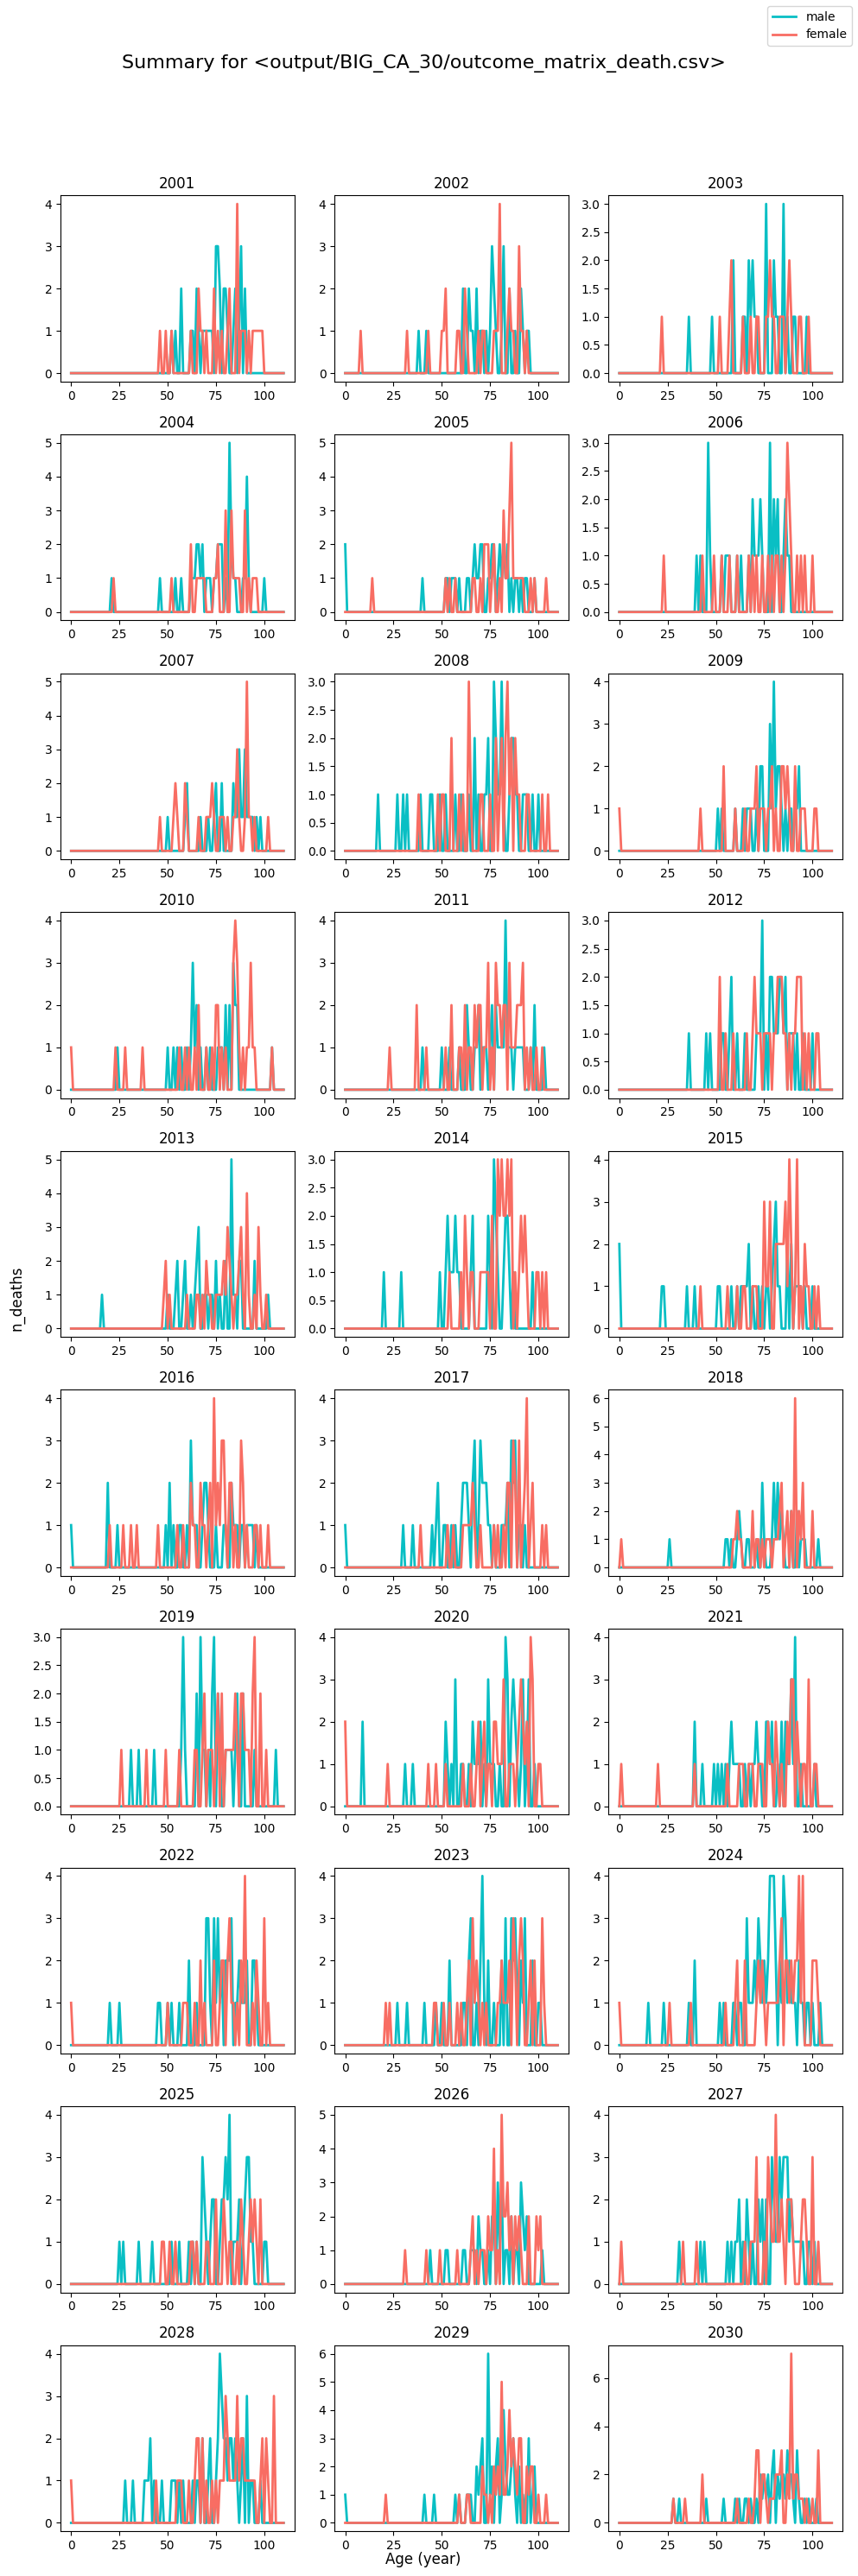

In [46]:
plot_simulation_csv('BIG_CA_30', 'death', 2)